In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy import stats
import os
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({'font.size': 20})

In [2]:
search_name = "baseline"
# search_name = "final"
# search_name = "ablation"

In [ ]:
searching = {
    "midas_oracle": ["es/add_global_deg_min_%.4f" % (alpha) for alpha in ss1],
    "midasB_oracle": ["essz/add_global_deg_min_%.2f_%.2f" % (alpha, beta) for alpha in ss1 for beta in ss2],
    "baseline": [
                "ns/add_global_deg_0.0000", # RNS
                "ns/add_global_deg_1.0000", # RDN
                "ff/ff_c_0.51_0.20", # FF
                "rw/rw_c_1.00_0.30", # RW
                "ns/add_ordered", # ONS
                "es/add_global_deg_min_0.0000", # RHS
                "tihs", # TIHS
                "midas_oracle" # MiDaS w. Oracle
                 ],
    "final": [
                "ns/add_global_deg_0.0000", # RNS
                "ns/add_global_deg_1.0000", # RDN
                "rw/rw_c_1.00_0.30", # RW
                "ff/ff_c_0.51_0.20",  # FF
                "ns/add_ordered", # ONS
                "essz/add_global_deg_min_0.00_0.00", # RHS
                "tihs", # TIHS
                "midas", # MiDaS w/o. Oracle
                "midasB", # MiDaS-B
    ],
    "ablation": [
                "midas_oracle", # MiDaS w. Oracle
                "midasB_oracle", # MiDaS-B w. Oracle
                "essz/add_global_deg_min_0.25_0.25", # top 1
                "essz/add_global_deg_min_0.00_0.00", # top 5
                "essz/add_global_deg_min_0.00_-0.25", # top 10
                "essz/add_global_deg_min_2.00_-1.00", # last
                "midasB"
    ]
}

targetalgos = searching[search_name]

In [4]:
evallist = ["clusteringcoef", "densification", "effdiameter", "overlapness"]
evaldistlist = ["degree", "intersection", "pairdeg", "size", "sv", "wcc"]

In [6]:
norm_dict = defaultdict(dict)
d = pd.read_csv("csvs/eval_diff_norm_all_%s.txt" % (search_name))
for i, row in d.iterrows():
    algoname = row["algoname"]
    for evalname in evaldistlist + evallist + ["avg"]:
        norm_dict[algoname][evalname] = row[evalname]        

rank_dict = defaultdict(dict)
d = pd.read_csv("csvs/eval_diff_rank_all_%s.txt" % (search_name))
for i, row in d.iterrows():
    algoname = row["algoname"]
    for evalname in evaldistlist + evallist + ["avg"]:
        rank_dict[algoname][evalname] = row[evalname]
        
diff_dict = defaultdict(dict)
d = pd.read_csv("csvs/eval_diff_all_%s.txt" % (search_name))
for i, row in d.iterrows():
    algoname = row["algoname"]
    for evalname in evaldistlist + evallist + ["avg"]:
        diff_dict[algoname][evalname] = row[evalname]

In [7]:
rename = {
    "degree": "Degree",
    "intersection": "Int. Size",
    "pairdeg": "Pair Degree",
    "size": "Size",
    "sv": "SV",
    "wcc": "CC",
    "clusteringcoef": "GCC",
    "densification": "Density",
    "overlapness": "Overlapness",
    "effdiameter": "Diameter",
    "avg": "Average",
    "rank": "Rank",
    "zscore": "Z-Score"
}

### 1. Quality

In [8]:
secondflag = False
metric_list = ["diff", "rank", "zscore"]
for evalname in evaldistlist + evallist + ["avg"]:
#     print(evalname)
    minval = {}
    minname = {}
    for metric in metric_list:
        minval[metric] = [10000,1000]
        minname[metric] = [None, None]
        
    for algoname in targetalgos:
        cur_val = {}
        cur_val["diff"] = diff_dict[algoname][evalname]
        cur_val["rank"] = rank_dict[algoname][evalname]
        cur_val["zscore"] = norm_dict[algoname][evalname]
        
        for metric in metric_list:
            val = cur_val[metric]
            if val < minval[metric][0]:
                minval[metric][1] = minval[metric][0]
                minname[metric][1] = minname[metric][0]
                minval[metric][0] = val
                minname[metric][0] = algoname
            elif val < minval[metric][1]:
                minval[metric][1] = val
                minname[metric][1] = algoname
    
    if evalname == "avg":
        line = "\\midrule\n" + "\\multirow{2}{*}{\\textbf{%s}}" % (rename[evalname])
    else:
        line = "\\midrule\n" + "\\multirow{3}{*}{\\textbf{%s}}" % (rename[evalname])
        
    for metric in metric_list:
        if evalname == "avg" and metric == "diff":
            continue
        if metric == "diff":
            if evalname in evallist:
                line += "& Diff." 
            else:
                line += "& Dstat. "
        else:
            line += "& " + rename[metric] + " "
        for algoname in targetalgos:
            if metric == "diff":
                val = diff_dict[algoname][evalname]
            elif metric == "rank":
                val = rank_dict[algoname][evalname]
            elif metric == "zscore":
                val = norm_dict[algoname][evalname] 
            
            if algoname == minname[metric][0]:
                line += "& \\textbf{%.3f} " % (val)
            elif algoname == minname[metric][1]:
                line += "& \\textit{%.3f} " % (val)
            else:
                line += "& %.3f " % (val)
        line += "\\\\"
        print(line)
        line = ""
    print()

\midrule
\multirow{3}{*}{\textbf{Degree}}& Dstat. & 0.126 & 0.352 & 0.412 & 0.363 & 0.293 & \textbf{0.065} & 0.350 & \textit{0.067} \\
& Rank & 2.525 & 6.000 & 7.050 & 6.000 & 4.825 & \textbf{1.600} & 5.850 & \textit{1.650} \\
& Z-Score & -0.826 & 0.665 & 0.968 & 0.698 & 0.252 & \textbf{-1.213} & 0.616 & \textit{-1.160} \\

\midrule
\multirow{3}{*}{\textbf{Int. Size}}& Dstat. & 0.082 & 0.047 & 0.036 & 0.040 & \textbf{0.030} & \textit{0.033} & 0.036 & 0.033 \\
& Rank & 5.975 & 5.475 & 4.925 & 4.250 & 4.025 & \textbf{3.275} & 4.275 & \textit{3.300} \\
& Z-Score & 0.848 & 0.279 & 0.183 & -0.032 & -0.183 & \textbf{-0.461} & -0.181 & \textit{-0.454} \\

\midrule
\multirow{3}{*}{\textbf{Pair Degree}}& Dstat. & 0.062 & 0.116 & 0.164 & 0.115 & 0.095 & \textit{0.047} & 0.109 & \textbf{0.041} \\
& Rank & 3.125 & 5.450 & 7.425 & 5.000 & 4.450 & \textit{2.625} & 5.250 & \textbf{2.175} \\
& Z-Score & -0.389 & 0.320 & 1.255 & 0.209 & -0.032 & \textit{-0.748} & 0.232 & \textbf{-0.847} \\

\midrule
\m

### 2. Robustness

In [ ]:
dataset = ["email-Enron-full", "email-Eu-full",  
           "contact-high-school", "contact-primary-school",
          "NDC-classes-full", "NDC-substances-full", "tags-ask-ubuntu", "tags-math-sx", 
           "threads-ask-ubuntu", "coauth-MAG-History-full", "coauth-MAG-Geology-full"]

In [113]:
color_dict = {
    "midas_oracle": "#be32be", #"#942894", # 파란색
    "midas": "#be32be", #"#942894", # 파란색
    "midasB": "#52E4DC", #"#942894", # 파란색
    "midasB_oracle": "#20B2AA",

    "es/add_global_deg_min_0.0000":  "#377eb8", # 하늘색
    "essz/add_global_deg_min_0.00_0.00":  "#377eb8", # 하늘색
    "ns/add_global_deg_0.0000": "#e41a1c",
    "ns/add_global_deg_1.0000": "#FF7A85", #"#F56E6E",

    "tihs": "#4daf4a", # 초록색
    "rw/rw_c_1.00_0.30": "#ff7f00", # 주황색
    "ff/ff_c_0.51_0.20": "#FFC81E", # 노랑색

    "ns/add_ordered" : "#D2691E",

    # ANSWER
    'answer': "#000000"
}

In [114]:
property_name = "avg"

In [115]:
result_diff_rank = defaultdict(dict)
result_diff_norm = defaultdict(dict)

for portion in [0.1, 0.3, 0.5, 0.7, 0.9]:
    # diff - rank
    d = pd.read_csv("csvs/eval_diff_rank_all_%.1f_%s.txt" % (portion, search_name))
    for i, row in d.iterrows():
        algoname = row["algoname"]
        for evalname in  evaldistlist + evallist + ["avg"]:
            if evalname not in result_diff_rank[algoname]:
                result_diff_rank[algoname][evalname] = []
            result_diff_rank[algoname][evalname].append(row[evalname])
    
    # diff - norm
    d = pd.read_csv("csvs/eval_diff_norm_all_%.1f_%s.txt" % (portion, search_name))
    for i, row in d.iterrows():
        algoname = row["algoname"]
        for evalname in evaldistlist + evallist + ["avg"]:
            if evalname not in result_diff_norm[algoname]:
                result_diff_norm[algoname][evalname] = []
            result_diff_norm[algoname][evalname].append(row[evalname])

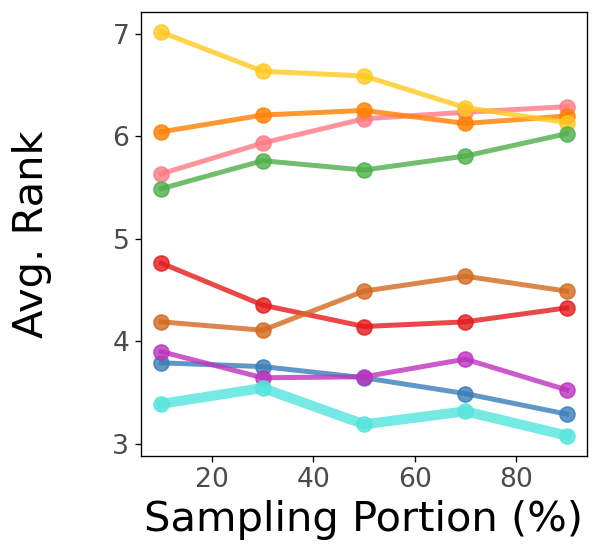

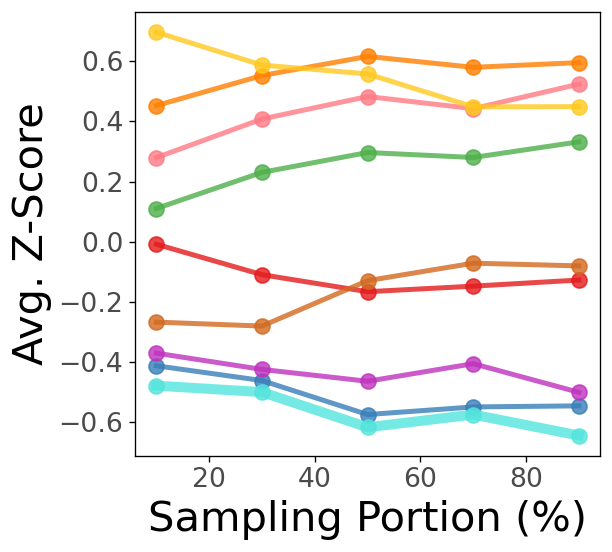

In [117]:
# Ranking
plt.figure(figsize=(5.5,5), dpi=120)
for algoname in result_diff_rank.keys():
    xs = [10, 30, 50, 70, 90]
    ys = result_diff_rank[algoname][property_name]
    if "essz_score" in algoname:
        plt.plot(xs, ys, marker='o', markersize=9, color=color_dict[algoname], linewidth=6, alpha=0.8, zorder=2)
    else:
        plt.plot(xs, ys, marker='o', markersize=9, color=color_dict[algoname], linewidth=3, alpha=0.8, zorder=1)
        
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelcolor='#4B4B4B', labelsize=16)
ax.tick_params(axis='x', which='minor', labelcolor='#4B4B4B',labelsize=14)
ax.tick_params(axis='x', which='major', labelcolor='#4B4B4B', labelsize=16)
ax.yaxis.set_label_coords(-0.2, 0.5)

plt.xlabel("Sampling Portion (%)", fontsize=25)
plt.ylabel("Avg. Rank", fontsize=25)
plt.tight_layout()
savedir = "figures/Robust/"
savefname = "figures/Robust/ranking_{}.jpg".format(search_name)
if os.path.isdir(savedir) is False:
    os.makedirs(savedir)
plt.savefig(savefname, bbox_inches='tight')
plt.show()
plt.close()

# Z-score
plt.figure(figsize=(5.5,5), dpi=120)
for algoname in result_diff_norm.keys():
    xs = [10, 30, 50, 70, 90]
    ys = result_diff_norm[algoname][property_name]
    if "essz_score" in algoname:
        plt.plot(xs, ys, marker='o', markersize=9, color=color_dict[algoname], linewidth=6, alpha=0.8, zorder=2)
    else:
        plt.plot(xs, ys, marker='o', markersize=9, color=color_dict[algoname], linewidth=3, alpha=0.8, zorder=1)
        
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelcolor='#4B4B4B', labelsize=16)
ax.tick_params(axis='x', which='minor', labelcolor='#4B4B4B',labelsize=14)
ax.tick_params(axis='x', which='major', labelcolor='#4B4B4B', labelsize=16)
plt.xlabel("Sampling Portion (%)", fontsize=25)
plt.ylabel("Avg. Z-Score", fontsize=25)
plt.tight_layout()
savedir = "figures/Robust/"
savefname = "figures/Robust/zscore_{}.jpg".format(search_name)
if os.path.isdir(savedir) is False:
    os.makedirs(savedir)
plt.savefig(savefname, bbox_inches='tight')
plt.show()
plt.close()

In [122]:
result_diff = defaultdict(dict) # algoname -> evalname -> portion list

for portion in [0.1, 0.3, 0.5, 0.7, 0.9]:
    agg_diff = {} # algoname -> evalname -> data list
    for dataname in dataset:
        d = pd.read_csv("csvs/%s/eval_%.1f_%s.txt" % (dataname, portion, search_name))
        for i, irow in d.iterrows():
            algoname = irow["algoname"]
            if algoname not in agg_diff:
                agg_diff[algoname] = defaultdict(list)
            for evalname in evaldistlist + evallist:
                val = irow[evalname]
                agg_diff[algoname][evalname].append(val)
    for algoname in agg_diff.keys():
        if algoname not in result_diff:
            result_diff[algoname] = defaultdict(list)
        for evalname in evaldistlist + evallist:
            avg_val = np.mean(agg_diff[algoname][evalname])
            result_diff[algoname][evalname].append(avg_val)

<ipython-input-123-3ca53aad8108>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 10, 30, 50, 70, 90])


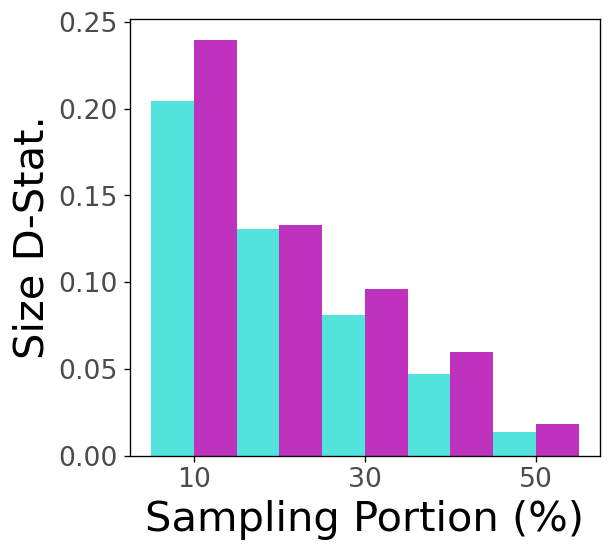

In [123]:
# Diff
target_algo = [ "midasB", "midas"]
w=0.5

plt.figure(figsize=(5.5,5), dpi=120)
for algoname in result_diff_norm.keys():
    # xs = np.array([10, 30, 50, 70, 90])
    xs = np.arange(5)
    ys = result_diff[algoname]["size"]
    if algoname == target_algo[0]:
        plt.bar(xs - w/2, ys, color=color_dict[algoname], width=w) #, alpha=0.9)
    elif algoname == target_algo[1]:
        plt.bar(xs + w/2, ys, color=color_dict[algoname], width=w) #, alpha=0.9)

ax = plt.gca()
ax.set_xticklabels([0, 10, 30, 50, 70, 90])
ax.tick_params(axis='y', which='major', labelcolor='#4B4B4B', labelsize=16)
ax.tick_params(axis='x', which='minor', labelcolor='#4B4B4B',labelsize=14)
ax.tick_params(axis='x', which='major', labelcolor='#4B4B4B', labelsize=16)
plt.xlabel("Sampling Portion (%)", fontsize=25)
plt.ylabel("Size D-Stat.", fontsize=25)
plt.tight_layout()
savedir = "figures/Robust/"
savefname = "figures/Robust/size_dstat_bar_{}.jpg".format(search_name)
if os.path.isdir(savedir) is False:
    os.makedirs(savedir)
plt.savefig(savefname, bbox_inches='tight')
plt.show()
plt.close()